In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

In [3]:
from collections import defaultdict
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage
import seaborn as sns
from matplotlib.colors import rgb2hex, colorConverter
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

In [4]:
pl_final_df = pd.read_csv('..\\Consolidated Data\\Premier League Final.csv')
del pl_final_df['Unnamed: 0']
pl_final_df.columns = ['Team', 'Avg_League_Pos', 'Total Player Value', 'League', 'Range1_Win_CL',
       'Range2_Win_CL', 'Range3_Win_CL', 'Range4_Win_CL', 'Range5_Win_CL',
       'Range1_Run_CL', 'Range2_Run_CL', 'Range3_Run_CL', 'Range4_Run_CL',
       'Range5_Run_CL', 'Range1_SF_CL', 'Range2_SF_CL', 'Range3_SF_CL',
       'Range4_SF_CL', 'Range5_SF_CL', 'Range1_Win_EL', 'Range2_Win_EL',
       'Range3_Win_EL', 'Range4_Win_EL', 'Range5_Win_EL', 'Range1_Run_EL',
       'Range2_Run_EL', 'Range3_Run_EL', 'Range4_Run_EL', 'Range5_Run_EL',
       'Range1_SF_EL', 'Range2_SF_EL', 'Range3_SF_EL', 'Range4_SF_EL',
       'Range5_SF_EL', 'WC_Player_Count', 'Player', 'Cup_Wins', 'Cup_Runners']

In [5]:
ll_final_df = pd.read_csv('..\\Consolidated Data\\La Liga Final.csv')
del ll_final_df['Unnamed: 0']
ll_final_df.columns = ['Team', 'Avg_League_Pos', 'Total Player Value', 'League', 'Range1_Win_CL',
       'Range2_Win_CL', 'Range3_Win_CL', 'Range4_Win_CL', 'Range5_Win_CL',
       'Range1_Run_CL', 'Range2_Run_CL', 'Range3_Run_CL', 'Range4_Run_CL',
       'Range5_Run_CL', 'Range1_SF_CL', 'Range2_SF_CL', 'Range3_SF_CL',
       'Range4_SF_CL', 'Range5_SF_CL', 'Range1_Win_EL', 'Range2_Win_EL',
       'Range3_Win_EL', 'Range4_Win_EL', 'Range5_Win_EL', 'Range1_Run_EL',
       'Range2_Run_EL', 'Range3_Run_EL', 'Range4_Run_EL', 'Range5_Run_EL',
       'Range1_SF_EL', 'Range2_SF_EL', 'Range3_SF_EL', 'Range4_SF_EL',
       'Range5_SF_EL', 'WC_Player_Count', 'Player', 'Cup_Wins', 'Cup_Runners']

In [6]:
tier1_df = pd.concat([pl_final_df,ll_final_df])

In [7]:
gl_final_df = pd.read_csv('..\\Consolidated Data\\Bundesliga Final.csv')
del gl_final_df['Unnamed: 0']
gl_final_df.columns = ['Team', 'Avg_League_Pos', 'Total Player Value', 'League', 'Range1_Win_CL',
       'Range2_Win_CL', 'Range3_Win_CL', 'Range4_Win_CL', 'Range5_Win_CL',
       'Range1_Run_CL', 'Range2_Run_CL', 'Range3_Run_CL', 'Range4_Run_CL',
       'Range5_Run_CL', 'Range1_SF_CL', 'Range2_SF_CL', 'Range3_SF_CL',
       'Range4_SF_CL', 'Range5_SF_CL', 'Range1_Win_EL', 'Range2_Win_EL',
       'Range3_Win_EL', 'Range4_Win_EL', 'Range5_Win_EL', 'Range1_Run_EL',
       'Range2_Run_EL', 'Range3_Run_EL', 'Range4_Run_EL', 'Range5_Run_EL',
       'Range1_SF_EL', 'Range2_SF_EL', 'Range3_SF_EL', 'Range4_SF_EL',
       'Range5_SF_EL', 'WC_Player_Count', 'Player', 'Cup_Wins', 'Cup_Runners']

In [8]:
il_final_df = pd.read_csv('..\\Consolidated Data\\Serie A Final.csv')
del il_final_df['Unnamed: 0']
il_final_df.columns = ['Team', 'Avg_League_Pos', 'Total Player Value', 'League', 'Range1_Win_CL',
       'Range2_Win_CL', 'Range3_Win_CL', 'Range4_Win_CL', 'Range5_Win_CL',
       'Range1_Run_CL', 'Range2_Run_CL', 'Range3_Run_CL', 'Range4_Run_CL',
       'Range5_Run_CL', 'Range1_SF_CL', 'Range2_SF_CL', 'Range3_SF_CL',
       'Range4_SF_CL', 'Range5_SF_CL', 'Range1_Win_EL', 'Range2_Win_EL',
       'Range3_Win_EL', 'Range4_Win_EL', 'Range5_Win_EL', 'Range1_Run_EL',
       'Range2_Run_EL', 'Range3_Run_EL', 'Range4_Run_EL', 'Range5_Run_EL',
       'Range1_SF_EL', 'Range2_SF_EL', 'Range3_SF_EL', 'Range4_SF_EL',
       'Range5_SF_EL', 'WC_Player_Count', 'Player', 'Cup_Wins', 'Cup_Runners']

In [9]:
tier2_df = pd.concat([gl_final_df,il_final_df])

In [10]:
fl_final_df = pd.read_csv('..\\Consolidated Data\\Ligue 1 Final.csv')
del fl_final_df['Unnamed: 0']
fl_final_df.columns = ['Team', 'Avg_League_Pos', 'Total Player Value', 'League', 'Range1_Win_CL',
       'Range2_Win_CL', 'Range3_Win_CL', 'Range4_Win_CL', 'Range5_Win_CL',
       'Range1_Run_CL', 'Range2_Run_CL', 'Range3_Run_CL', 'Range4_Run_CL',
       'Range5_Run_CL', 'Range1_SF_CL', 'Range2_SF_CL', 'Range3_SF_CL',
       'Range4_SF_CL', 'Range5_SF_CL', 'Range1_Win_EL', 'Range2_Win_EL',
       'Range3_Win_EL', 'Range4_Win_EL', 'Range5_Win_EL', 'Range1_Run_EL',
       'Range2_Run_EL', 'Range3_Run_EL', 'Range4_Run_EL', 'Range5_Run_EL',
       'Range1_SF_EL', 'Range2_SF_EL', 'Range3_SF_EL', 'Range4_SF_EL',
       'Range5_SF_EL', 'WC_Player_Count', 'Player', 'Cup_Wins', 'Cup_Runners']

In [11]:
dl_final_df = pd.read_csv('..\\Consolidated Data\\Eredivise Final.csv')
del dl_final_df['Unnamed: 0']
dl_final_df.columns = ['Team', 'Avg_League_Pos', 'Total Player Value', 'League', 'Range1_Win_CL',
       'Range2_Win_CL', 'Range3_Win_CL', 'Range4_Win_CL', 'Range5_Win_CL',
       'Range1_Run_CL', 'Range2_Run_CL', 'Range3_Run_CL', 'Range4_Run_CL',
       'Range5_Run_CL', 'Range1_SF_CL', 'Range2_SF_CL', 'Range3_SF_CL',
       'Range4_SF_CL', 'Range5_SF_CL', 'Range1_Win_EL', 'Range2_Win_EL',
       'Range3_Win_EL', 'Range4_Win_EL', 'Range5_Win_EL', 'Range1_Run_EL',
       'Range2_Run_EL', 'Range3_Run_EL', 'Range4_Run_EL', 'Range5_Run_EL',
       'Range1_SF_EL', 'Range2_SF_EL', 'Range3_SF_EL', 'Range4_SF_EL',
       'Range5_SF_EL', 'WC_Player_Count', 'Player', 'Cup_Wins', 'Cup_Runners']

In [12]:
tier3_df = pd.concat([fl_final_df,dl_final_df])

In [13]:
el_weight = 0.5
cl_weight = 1
winner_wt = 1
runner_wt = 0.8
sf_wt = 0.5
range1_wt = 1
range2_wt = 0.9
range3_wt = 0.8
range4_wt = 0.7
range5_wt = 0.6
tier_1_lg = 1
tier_2_lg = 0.75
tier_3_lg = 0.5
national_cup = 0.2

In [14]:
tier1_df['Avg_League_Pos']=tier1_df['Avg_League_Pos'] * 1*1*tier_1_lg
tier1_df['Total Player Value']=tier1_df['Total Player Value'] * 1*1*tier_1_lg
tier1_df['Range1_Win_CL']=tier1_df['Range1_Win_CL'] * winner_wt*range1_wt*cl_weight
tier1_df['Range2_Win_CL']=tier1_df['Range2_Win_CL'] * winner_wt*range2_wt*cl_weight
tier1_df['Range3_Win_CL']=tier1_df['Range3_Win_CL'] * winner_wt*range3_wt*cl_weight
tier1_df['Range4_Win_CL']=tier1_df['Range4_Win_CL'] * winner_wt*range4_wt*cl_weight
tier1_df['Range5_Win_CL']=tier1_df['Range5_Win_CL'] * winner_wt*range5_wt*cl_weight
tier1_df['Range1_Run_CL']=tier1_df['Range1_Run_CL'] * runner_wt*range1_wt*cl_weight
tier1_df['Range2_Run_CL']=tier1_df['Range2_Run_CL'] * runner_wt*range2_wt*cl_weight
tier1_df['Range3_Run_CL']=tier1_df['Range3_Run_CL'] * runner_wt*range3_wt*cl_weight
tier1_df['Range4_Run_CL']=tier1_df['Range4_Run_CL'] * runner_wt*range4_wt*cl_weight
tier1_df['Range5_Run_CL']=tier1_df['Range5_Run_CL'] * runner_wt*range5_wt*cl_weight
tier1_df['Range1_SF_CL']=tier1_df['Range1_SF_CL'] * sf_wt*range1_wt*cl_weight
tier1_df['Range2_SF_CL']=tier1_df['Range2_SF_CL'] * sf_wt*range2_wt*cl_weight
tier1_df['Range3_SF_CL']=tier1_df['Range3_SF_CL'] * sf_wt*range3_wt*cl_weight
tier1_df['Range4_SF_CL']=tier1_df['Range4_SF_CL'] * sf_wt*range4_wt*cl_weight
tier1_df['Range5_SF_CL']=tier1_df['Range5_SF_CL'] * sf_wt*range5_wt*cl_weight
tier1_df['Range1_Win_EL']=tier1_df['Range1_Win_EL'] * winner_wt*range1_wt*el_weight
tier1_df['Range2_Win_EL']=tier1_df['Range2_Win_EL'] * winner_wt*range2_wt*el_weight
tier1_df['Range3_Win_EL']=tier1_df['Range3_Win_EL'] * winner_wt*range3_wt*el_weight
tier1_df['Range4_Win_EL']=tier1_df['Range4_Win_EL'] * winner_wt*range4_wt*el_weight
tier1_df['Range5_Win_EL']=tier1_df['Range5_Win_EL'] * winner_wt*range5_wt*el_weight
tier1_df['Range1_Run_EL']=tier1_df['Range1_Run_EL'] * runner_wt*range1_wt*el_weight
tier1_df['Range2_Run_EL']=tier1_df['Range2_Run_EL'] * runner_wt*range2_wt*el_weight
tier1_df['Range3_Run_EL']=tier1_df['Range3_Run_EL'] * runner_wt*range3_wt*el_weight
tier1_df['Range4_Run_EL']=tier1_df['Range4_Run_EL'] * runner_wt*range4_wt*el_weight
tier1_df['Range5_Run_EL']=tier1_df['Range5_Run_EL'] * runner_wt*range5_wt*el_weight
tier1_df['Range1_SF_EL']=tier1_df['Range1_SF_EL'] * sf_wt*range1_wt*el_weight
tier1_df['Range2_SF_EL']=tier1_df['Range2_SF_EL'] * sf_wt*range2_wt*el_weight
tier1_df['Range3_SF_EL']=tier1_df['Range3_SF_EL'] * sf_wt*range3_wt*el_weight
tier1_df['Range4_SF_EL']=tier1_df['Range4_SF_EL'] * sf_wt*range4_wt*el_weight
tier1_df['Range5_SF_EL']=tier1_df['Range5_SF_EL'] * sf_wt*range5_wt*el_weight
tier1_df['WC_Player_Count']=tier1_df['WC_Player_Count'] * 1*1*tier_1_lg
tier1_df['Player']=tier1_df['Player'] * 1*1*tier_1_lg
tier1_df['Cup_Wins']=tier1_df['Cup_Wins'] * winner_wt*1*tier_1_lg*national_cup
tier1_df['Cup_Runners']=tier1_df['Cup_Runners'] * runner_wt*1*tier_1_lg*national_cup

In [15]:
tier2_df['Avg_League_Pos']=tier2_df['Avg_League_Pos'] * 1*1*tier_2_lg
tier2_df['Total Player Value']=tier2_df['Total Player Value'] * 1*1*tier_2_lg
tier2_df['Range1_Win_CL']=tier2_df['Range1_Win_CL'] * winner_wt*range1_wt*cl_weight
tier2_df['Range2_Win_CL']=tier2_df['Range2_Win_CL'] * winner_wt*range2_wt*cl_weight
tier2_df['Range3_Win_CL']=tier2_df['Range3_Win_CL'] * winner_wt*range3_wt*cl_weight
tier2_df['Range4_Win_CL']=tier2_df['Range4_Win_CL'] * winner_wt*range4_wt*cl_weight
tier2_df['Range5_Win_CL']=tier2_df['Range5_Win_CL'] * winner_wt*range5_wt*cl_weight
tier2_df['Range1_Run_CL']=tier2_df['Range1_Run_CL'] * runner_wt*range1_wt*cl_weight
tier2_df['Range2_Run_CL']=tier2_df['Range2_Run_CL'] * runner_wt*range2_wt*cl_weight
tier2_df['Range3_Run_CL']=tier2_df['Range3_Run_CL'] * runner_wt*range3_wt*cl_weight
tier2_df['Range4_Run_CL']=tier2_df['Range4_Run_CL'] * runner_wt*range4_wt*cl_weight
tier2_df['Range5_Run_CL']=tier2_df['Range5_Run_CL'] * runner_wt*range5_wt*cl_weight
tier2_df['Range1_SF_CL']=tier2_df['Range1_SF_CL'] * sf_wt*range1_wt*cl_weight
tier2_df['Range2_SF_CL']=tier2_df['Range2_SF_CL'] * sf_wt*range2_wt*cl_weight
tier2_df['Range3_SF_CL']=tier2_df['Range3_SF_CL'] * sf_wt*range3_wt*cl_weight
tier2_df['Range4_SF_CL']=tier2_df['Range4_SF_CL'] * sf_wt*range4_wt*cl_weight
tier2_df['Range5_SF_CL']=tier2_df['Range5_SF_CL'] * sf_wt*range5_wt*cl_weight
tier2_df['Range1_Win_EL']=tier2_df['Range1_Win_EL'] * winner_wt*range1_wt*el_weight
tier2_df['Range2_Win_EL']=tier2_df['Range2_Win_EL'] * winner_wt*range2_wt*el_weight
tier2_df['Range3_Win_EL']=tier2_df['Range3_Win_EL'] * winner_wt*range3_wt*el_weight
tier2_df['Range4_Win_EL']=tier2_df['Range4_Win_EL'] * winner_wt*range4_wt*el_weight
tier2_df['Range5_Win_EL']=tier2_df['Range5_Win_EL'] * winner_wt*range5_wt*el_weight
tier2_df['Range1_Run_EL']=tier2_df['Range1_Run_EL'] * runner_wt*range1_wt*el_weight
tier2_df['Range2_Run_EL']=tier2_df['Range2_Run_EL'] * runner_wt*range2_wt*el_weight
tier2_df['Range3_Run_EL']=tier2_df['Range3_Run_EL'] * runner_wt*range3_wt*el_weight
tier2_df['Range4_Run_EL']=tier2_df['Range4_Run_EL'] * runner_wt*range4_wt*el_weight
tier2_df['Range5_Run_EL']=tier2_df['Range5_Run_EL'] * runner_wt*range5_wt*el_weight
tier2_df['Range1_SF_EL']=tier2_df['Range1_SF_EL'] * sf_wt*range1_wt*el_weight
tier2_df['Range2_SF_EL']=tier2_df['Range2_SF_EL'] * sf_wt*range2_wt*el_weight
tier2_df['Range3_SF_EL']=tier2_df['Range3_SF_EL'] * sf_wt*range3_wt*el_weight
tier2_df['Range4_SF_EL']=tier2_df['Range4_SF_EL'] * sf_wt*range4_wt*el_weight
tier2_df['Range5_SF_EL']=tier2_df['Range5_SF_EL'] * sf_wt*range5_wt*el_weight
tier2_df['WC_Player_Count']=tier2_df['WC_Player_Count'] * 1*1*tier_2_lg
tier2_df['Player']=tier2_df['Player'] * 1*1*tier_2_lg
tier2_df['Cup_Wins']=tier2_df['Cup_Wins'] * winner_wt*1*tier_2_lg*national_cup
tier2_df['Cup_Runners']=tier2_df['Cup_Runners'] * runner_wt*1*tier_2_lg*national_cup

In [16]:
tier3_df['Avg_League_Pos']=tier3_df['Avg_League_Pos'] * 1*1*tier_3_lg
tier3_df['Total Player Value']=tier3_df['Total Player Value'] * 1*1*tier_3_lg
tier3_df['Range1_Win_CL']=tier3_df['Range1_Win_CL'] * winner_wt*range1_wt*cl_weight
tier3_df['Range2_Win_CL']=tier3_df['Range2_Win_CL'] * winner_wt*range2_wt*cl_weight
tier3_df['Range3_Win_CL']=tier3_df['Range3_Win_CL'] * winner_wt*range3_wt*cl_weight
tier3_df['Range4_Win_CL']=tier3_df['Range4_Win_CL'] * winner_wt*range4_wt*cl_weight
tier3_df['Range5_Win_CL']=tier3_df['Range5_Win_CL'] * winner_wt*range5_wt*cl_weight
tier3_df['Range1_Run_CL']=tier3_df['Range1_Run_CL'] * runner_wt*range1_wt*cl_weight
tier3_df['Range2_Run_CL']=tier3_df['Range2_Run_CL'] * runner_wt*range2_wt*cl_weight
tier3_df['Range3_Run_CL']=tier3_df['Range3_Run_CL'] * runner_wt*range3_wt*cl_weight
tier3_df['Range4_Run_CL']=tier3_df['Range4_Run_CL'] * runner_wt*range4_wt*cl_weight
tier3_df['Range5_Run_CL']=tier3_df['Range5_Run_CL'] * runner_wt*range5_wt*cl_weight
tier3_df['Range1_SF_CL']=tier3_df['Range1_SF_CL'] * sf_wt*range1_wt*cl_weight
tier3_df['Range2_SF_CL']=tier3_df['Range2_SF_CL'] * sf_wt*range2_wt*cl_weight
tier3_df['Range3_SF_CL']=tier3_df['Range3_SF_CL'] * sf_wt*range3_wt*cl_weight
tier3_df['Range4_SF_CL']=tier3_df['Range4_SF_CL'] * sf_wt*range4_wt*cl_weight
tier3_df['Range5_SF_CL']=tier3_df['Range5_SF_CL'] * sf_wt*range5_wt*cl_weight
tier3_df['Range1_Win_EL']=tier3_df['Range1_Win_EL'] * winner_wt*range1_wt*el_weight
tier3_df['Range2_Win_EL']=tier3_df['Range2_Win_EL'] * winner_wt*range2_wt*el_weight
tier3_df['Range3_Win_EL']=tier3_df['Range3_Win_EL'] * winner_wt*range3_wt*el_weight
tier3_df['Range4_Win_EL']=tier3_df['Range4_Win_EL'] * winner_wt*range4_wt*el_weight
tier3_df['Range5_Win_EL']=tier3_df['Range5_Win_EL'] * winner_wt*range5_wt*el_weight
tier3_df['Range1_Run_EL']=tier3_df['Range1_Run_EL'] * runner_wt*range1_wt*el_weight
tier3_df['Range2_Run_EL']=tier3_df['Range2_Run_EL'] * runner_wt*range2_wt*el_weight
tier3_df['Range3_Run_EL']=tier3_df['Range3_Run_EL'] * runner_wt*range3_wt*el_weight
tier3_df['Range4_Run_EL']=tier3_df['Range4_Run_EL'] * runner_wt*range4_wt*el_weight
tier3_df['Range5_Run_EL']=tier3_df['Range5_Run_EL'] * runner_wt*range5_wt*el_weight
tier3_df['Range1_SF_EL']=tier3_df['Range1_SF_EL'] * sf_wt*range1_wt*el_weight
tier3_df['Range2_SF_EL']=tier3_df['Range2_SF_EL'] * sf_wt*range2_wt*el_weight
tier3_df['Range3_SF_EL']=tier3_df['Range3_SF_EL'] * sf_wt*range3_wt*el_weight
tier3_df['Range4_SF_EL']=tier3_df['Range4_SF_EL'] * sf_wt*range4_wt*el_weight
tier3_df['Range5_SF_EL']=tier3_df['Range5_SF_EL'] * sf_wt*range5_wt*el_weight
tier3_df['WC_Player_Count']=tier3_df['WC_Player_Count'] * 1*1*tier_3_lg
tier3_df['Player']=tier3_df['Player'] * 1*1*tier_3_lg
tier3_df['Cup_Wins']=tier3_df['Cup_Wins'] * winner_wt*1*tier_3_lg*national_cup
tier3_df['Cup_Runners']=tier3_df['Cup_Runners'] * runner_wt*1*tier_3_lg*national_cup


In [17]:
complete_df = pd.concat([tier1_df,tier2_df,tier3_df])

In [18]:
complete_df['Player'] = complete_df['Player']/8
complete_df['Cup_Wins'] = complete_df['Cup_Wins']/15
complete_df['Cup_Runners'] = complete_df['Cup_Runners']/15
complete_df['Total Player Value'] = complete_df['Total Player Value']/1150
complete_df['WC_Player_Count'] = complete_df['WC_Player_Count']/16

In [19]:
complete_df=complete_df.drop(columns=['League'])
complete_df=complete_df.set_index('Team')

In [20]:
def create_dend(test_df):
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
    Z = linkage(test_df.values, 'ward')
    Z2 = linkage(test_df.values, 'centroid')
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.ylabel('distance')
    den=dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    return get_cluster_classes(den)

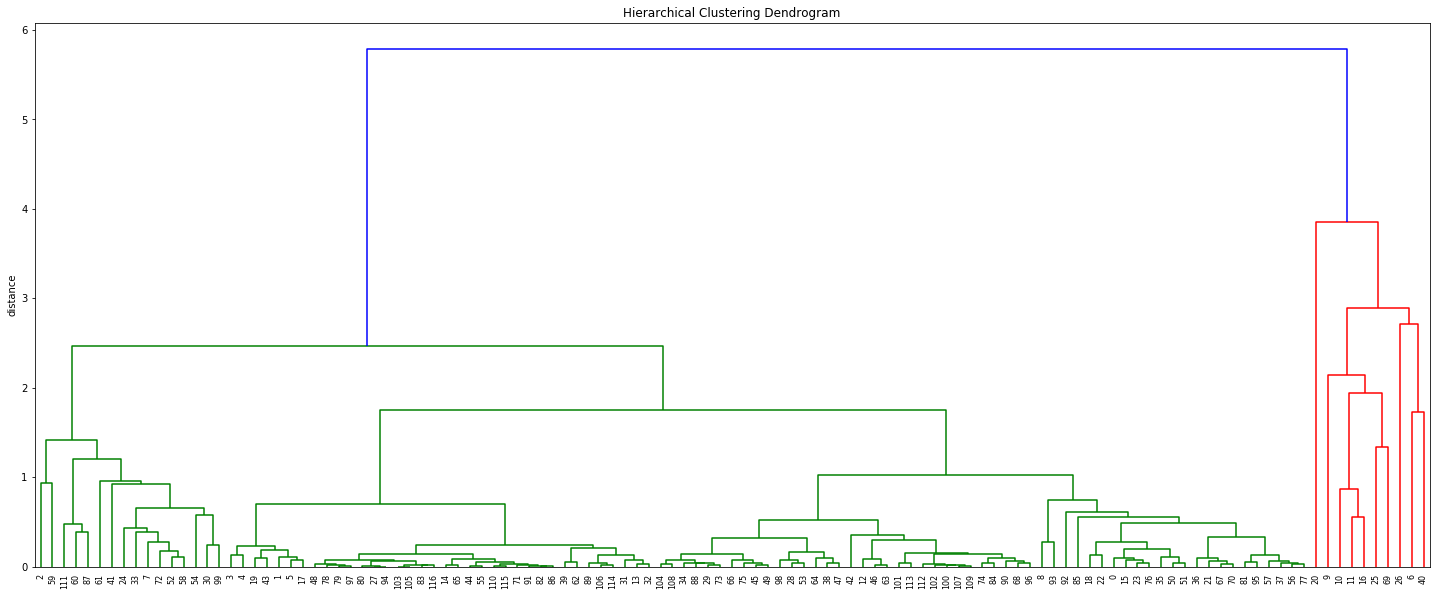

In [21]:
dend_results = create_dend(complete_df)

In [22]:
tier1_df = complete_df.iloc[dend_results['r']]
tier2_df = complete_df.iloc[dend_results['g']]

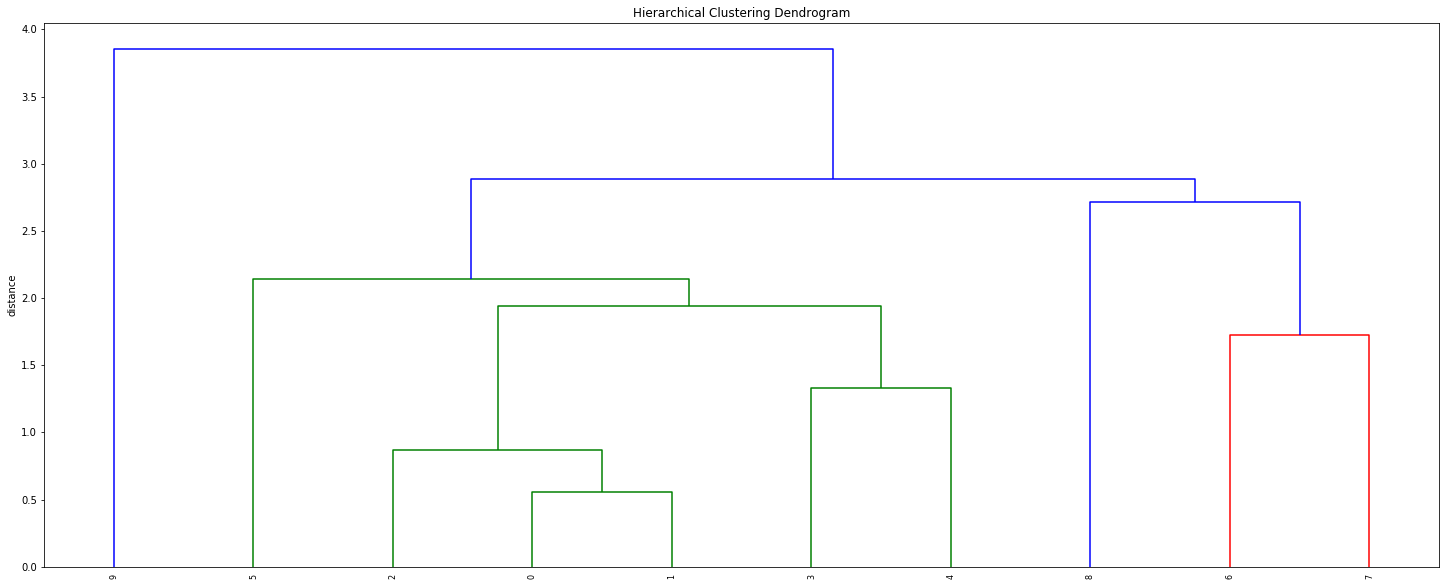

In [23]:
dend_results = create_dend(tier1_df)
tier1A_df = pd.concat([tier1_df.iloc[dend_results['r']],tier1_df.iloc[dend_results['b']]])
tier1B_df = tier1_df.iloc[dend_results['g']]

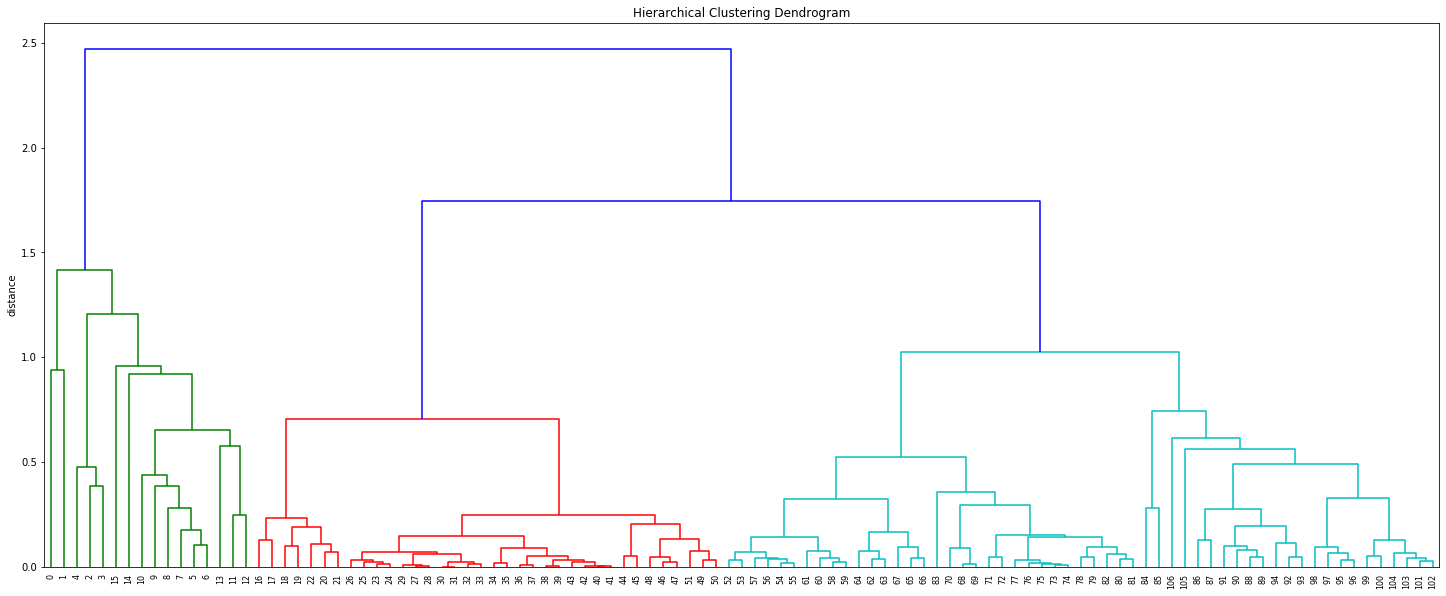

In [24]:
dend_results = create_dend(tier2_df)
tier3_df = tier2_df.iloc[dend_results['g']]
tier2A_df = pd.concat([tier2_df.iloc[dend_results['c']],tier2_df.iloc[dend_results['r']]])

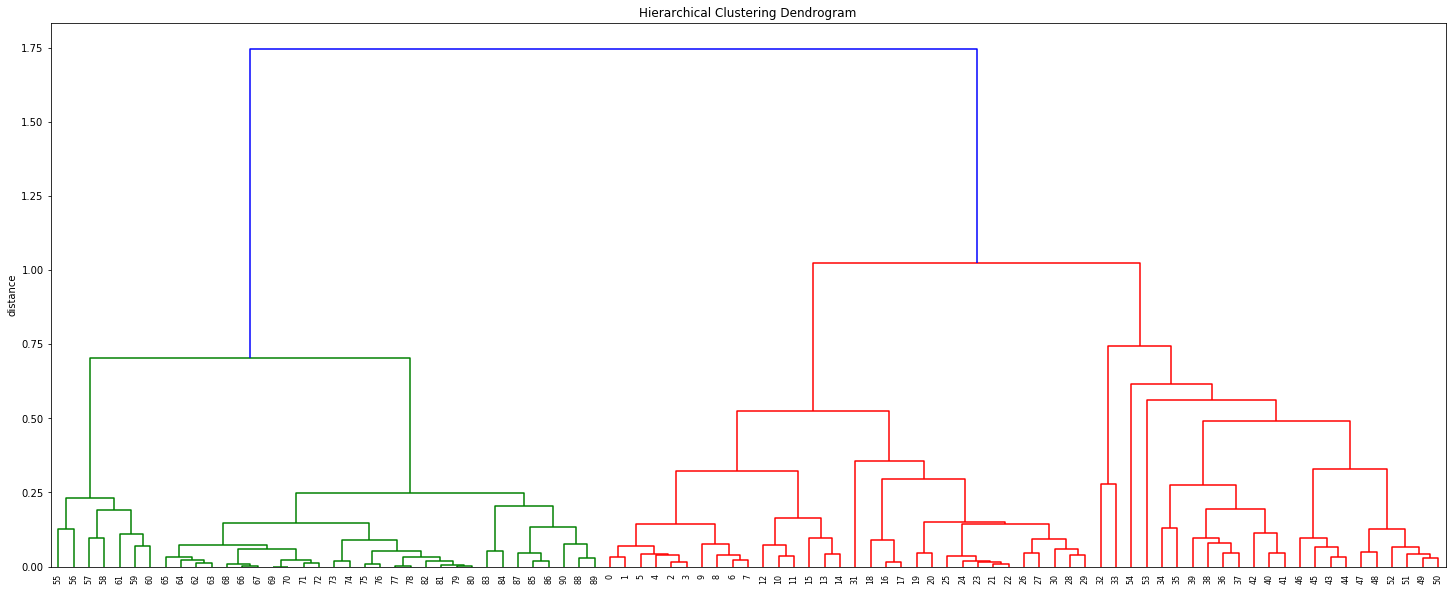

In [25]:
dend_results = create_dend(tier2A_df)
tier2AB_df = tier2A_df.iloc[dend_results['g']]
tier2AA_df = tier2A_df.iloc[dend_results['r']]

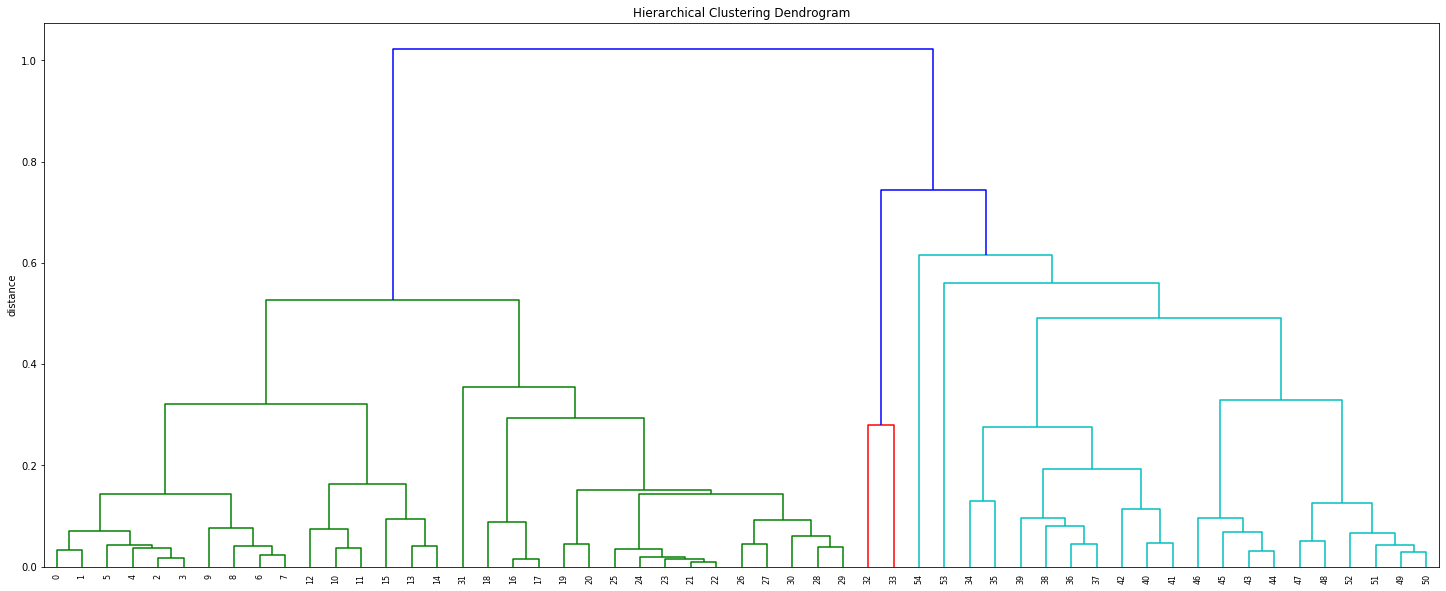

In [26]:
dend_results = create_dend(tier2AA_df)
tier2AAA_df = pd.concat([tier2AA_df.iloc[dend_results['c']],tier2AA_df.iloc[dend_results['r']]])
tier2AAB_df = tier2AA_df.iloc[dend_results['g']]

In [27]:
dend_results = create_dend(tier2AAB_df)
tier2AABA_df = tier2AAB_df.iloc[dend_results['r']]
tier2AABB_df = tier2AAB_df.iloc[dend_results['g']]

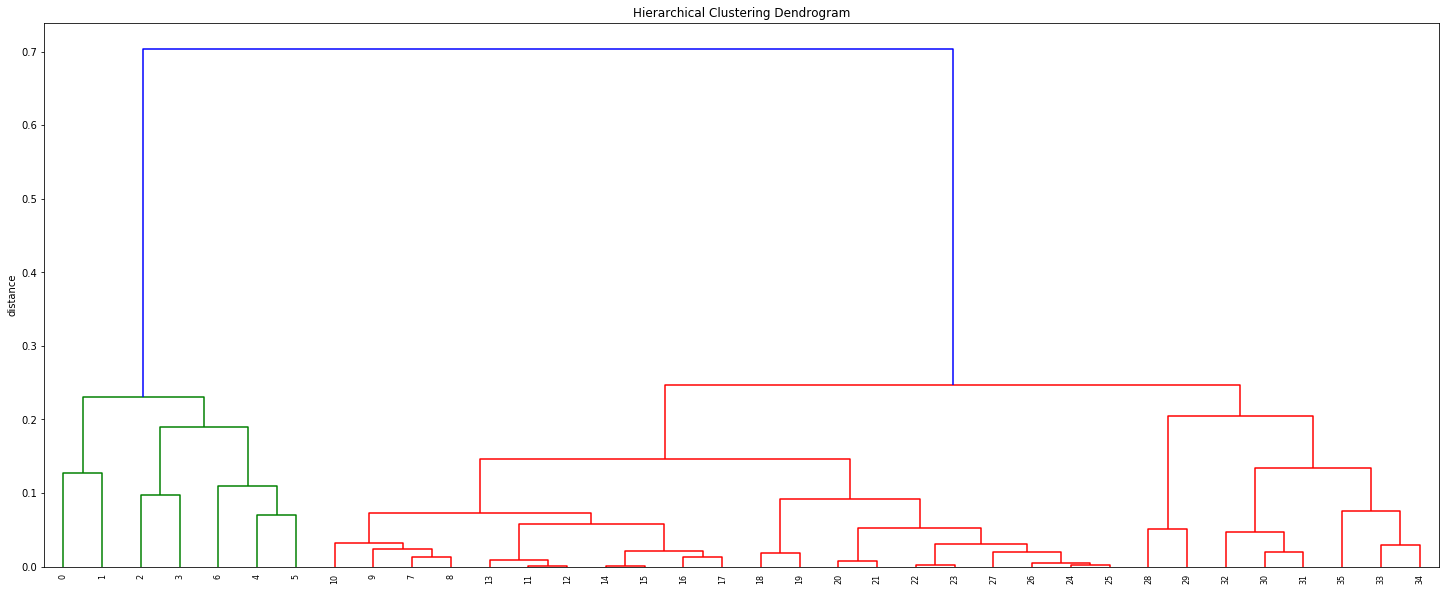

In [28]:
dend_results = create_dend(tier2AB_df)
tier2ABB_df = tier2AA_df.iloc[dend_results['g']]
tier2ABA_df = tier2AA_df.iloc[dend_results['r']]

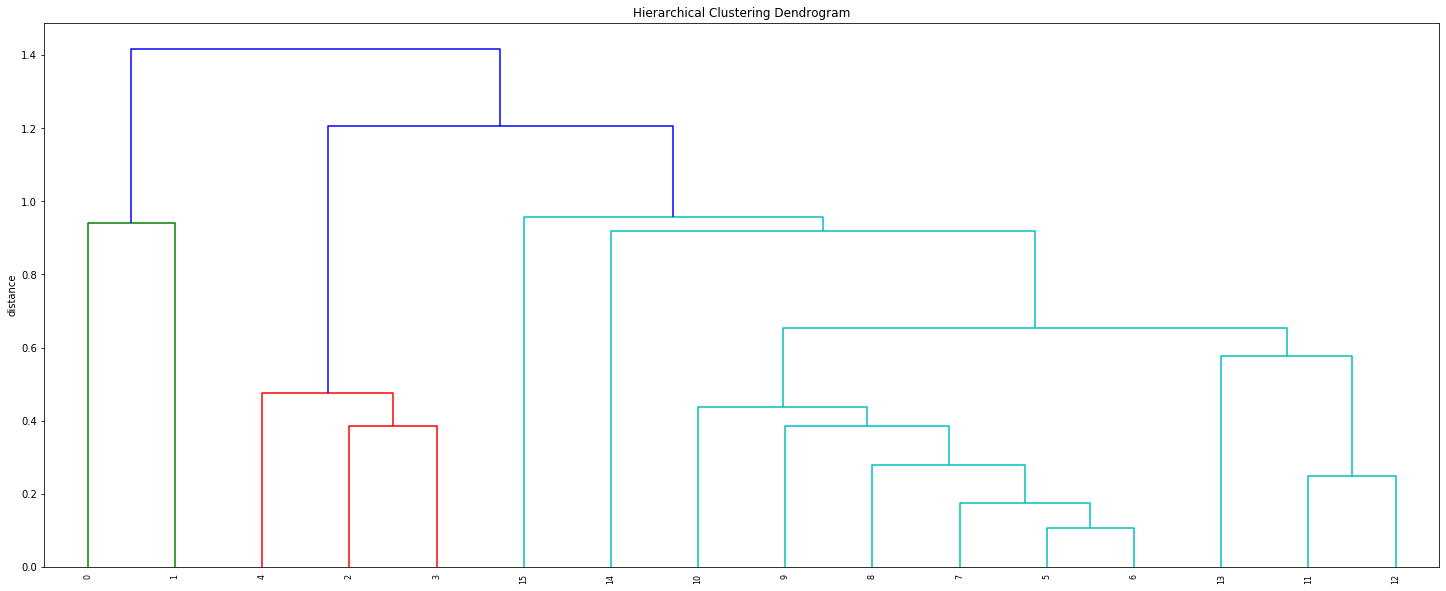

In [29]:
dend_results = create_dend(tier3_df)
tier3A_df = tier3_df.iloc[dend_results['c']]
tier3B_df = pd.concat([tier3_df.iloc[dend_results['g']],tier3_df.iloc[dend_results['r']]])

In [30]:
working_df = complete_df

for i in range(0,len(tier1A_df)):
    working_df=working_df.drop(working_df[working_df.index==tier1A_df.index[i]].index,axis=0)

for i in range(0,len(tier1B_df)):
    working_df=working_df.drop(working_df[working_df.index==tier1B_df.index[i]].index,axis=0)

for i in range(0,len(tier3B_df)):
    working_df=working_df.drop(working_df[working_df.index==tier3B_df.index[i]].index,axis=0)

for i in range(0,len(tier3A_df)):
    working_df=working_df.drop(working_df[working_df.index==tier3A_df.index[i]].index,axis=0)

for i in range(0,len(tier2AAA_df)):
    working_df=working_df.drop(working_df[working_df.index==tier2AAA_df.index[i]].index,axis=0)

for i in range(0,len(tier2AABA_df)):
    working_df=working_df.drop(working_df[working_df.index==tier2AABA_df.index[i]].index,axis=0)

In [31]:
team_rankings = pd.DataFrame(columns=['Team','Tier'],index=None)

for i in range(0,len(tier1A_df)):
    team_rankings=team_rankings.append({'Team': tier1A_df.index[i], 'Tier': 1},ignore_index=True)

for i in range(0,len(tier1B_df)):
    team_rankings=team_rankings.append({'Team': tier1B_df.index[i], 'Tier': 2},ignore_index=True)

for i in range(0,len(tier3B_df)):
    team_rankings=team_rankings.append({'Team': tier3B_df.index[i], 'Tier': 3},ignore_index=True)

for i in range(0,len(tier3A_df)):
    team_rankings=team_rankings.append({'Team': tier3A_df.index[i], 'Tier': 4},ignore_index=True)

for i in range(0,len(tier2AAA_df)):
    team_rankings=team_rankings.append({'Team': tier2AAA_df.index[i], 'Tier': 5},ignore_index=True)

for i in range(0,len(tier2AABA_df)):
    team_rankings=team_rankings.append({'Team': tier2AABA_df.index[i], 'Tier': 6},ignore_index=True)

for i in range(0,len(working_df)):
    team_rankings=team_rankings.append({'Team': working_df.index[i], 'Tier': 7},ignore_index=True)

In [32]:
team_rankings

Team Tier
0              Chelsea    1
1        Bayern Munich    1
2            Barcelona    1
3          Real Madrid    1
4              Man Utd    2
5            Tottenham    2
6             Man City    2
7      Atletico Madrid    2
8             Juventus    2
9            Liverpool    2
10             Arsenal    3
11            AC Milan    3
12             AS Roma    3
13              Monaco    3
14                Ajax    3
15          Leverkusen    4
16    Bayer Leverkusen    4
17              Napoli    4
18             Everton    4
19            Valencia    4
20             Sevilla    4
21          Villarreal    4
22       PSV Eindhoven    4
23             Schalke    4
24   Borussia Dortmund    4
25         Inter Milan    4
26            West Ham    5
27       Real Sociedad    5
28       Celta de Vigo    5
29              Torino    5
..                 ...  ...
87               Mainz    7
88        Union Berlin    7
89                SPAL    7
90             Bologna    7
91             Brescia    7
92            Cagliari    7
93               Lecce    7
94               Parma    7
95            Sassuolo    7
96              Verona    7
97              Amiens    7
98              Angers    7
99               Brest    7
100              Dijon    7
101               Metz    7
102        Montpellier    7
103             Nantes    7
104              Nimes    7
105              Reims    7
106         Strasbourg    7
107           Toulouse    7
108          VVV-Venlo    7
109    Heracles Almelo    7
110   Sparta Rotterdam    7
111         PEC Zwolle    7
112       ADO Den Haag    7
113    Fortuna Sittard    7
114          Willem II    7
115              Emmen    7
116           Waalwijk    7

[117 rows x 2 columns]